In [5]:
import pandas as pd 
import numpy as np

In [6]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2.17.0


In [7]:
train_dir = '/home/mhsalmaan/Documents/PGSoftwareLab/Project/MalnetImageClassification/archive/malnet-images-tiny/train'
test_dir = '/home/mhsalmaan/Documents/PGSoftwareLab/Project/MalnetImageClassification/archive/malnet-images-tiny/test'
validation_dir = '/home/mhsalmaan/Documents/PGSoftwareLab/Project/MalnetImageClassification/archive/malnet-images-tiny/val'

# Image data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'  # Handle borders after augmentation
)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='categorical'  # Since this is multi-class classification
)

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Disable shuffling for consistent evaluation
)

Found 61201 images belonging to 43 classes.
Found 8743 images belonging to 43 classes.
Found 17486 images belonging to 43 classes.


In [8]:
print(train_generator.class_indices)
print(test_generator.class_indices)
print(validation_generator.class_indices)

{'addisplay': 0, 'addisplay++adware': 1, 'adload': 2, 'adsware': 3, 'adware++adware': 4, 'adware++grayware++virus': 5, 'adware++virus': 6, 'adwareare': 7, 'backdoor': 8, 'banker++trojan': 9, 'click': 10, 'clicker': 11, 'clicker++trojan': 12, 'clickfraud++riskware': 13, 'downloader': 14, 'dropper++trojan': 15, 'exploit': 16, 'fakeangry': 17, 'fakeapp': 18, 'fakeapp++trojan': 19, 'fakeinst++trojan': 20, 'gray': 21, 'hacktool': 22, 'malware': 23, 'malware++trj': 24, 'monitor': 25, 'ransom++trojan': 26, 'risktool++riskware++virus': 27, 'riskware++smssend': 28, 'rog': 29, 'rootnik++trojan': 30, 'smssend': 31, 'smssend++trojan': 32, 'spr': 33, 'spy': 34, 'spy++trojan': 35, 'spyware': 36, 'trj': 37, 'troj': 38, 'trojandownloader': 39, 'trojandropper': 40, 'virus': 41, 'worm': 42}
{'addisplay': 0, 'addisplay++adware': 1, 'adload': 2, 'adsware': 3, 'adware++adware': 4, 'adware++grayware++virus': 5, 'adware++virus': 6, 'adwareare': 7, 'backdoor': 8, 'banker++trojan': 9, 'click': 10, 'clicker': 1

In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

def build_pretrained_model(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

input_shape = (224, 224, 3)
num_classes = len(train_generator.class_indices) 

model = build_pretrained_model(input_shape, num_classes)

I0000 00:00:1729838640.330833    4769 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729838640.703666    4769 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729838640.706596    4769 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729838640.712209    4769 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [10]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
import PIL
print(PIL.__version__)

11.0.0


In [12]:
history = model.fit(
    train_generator,
    epochs=5,        
    validation_data=validation_generator
)

/home/mhsalmaan/Documents/PGSoftwareLab/Project/MalnetImageClassification/test/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


2024-10-25 12:14:14.058710: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.
I0000 00:00:1729838654.075576   10800 service.cc:146] XLA service 0x7f913004c170 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729838654.075608   10800 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 with Max-Q Design, Compute Capability 7.5
2024-10-25 12:14:14.424077: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-25 12:14:14.550938: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.
2024-10-25 12:14:15.789857: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
I0000 00:00:1729838663.780146   10800 device_compiler.h:188] Compiled cluster using XL

   3/1913 ━━━━━━━━━━━━━━━━━━━━ 9:03 285ms/step - accuracy: 0.0747 - loss: 10.4111

2024-10-25 12:14:24.382444: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.


   5/1913 ━━━━━━━━━━━━━━━━━━━━ 12:59 408ms/step - accuracy: 0.0726 - loss: 12.5808

2024-10-25 12:14:25.438133: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.


   6/1913 ━━━━━━━━━━━━━━━━━━━━ 13:28 424ms/step - accuracy: 0.0701 - loss: 13.1903

2024-10-25 12:14:25.932216: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.


1913/1913 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.1883 - loss: 3.8255

/home/mhsalmaan/Documents/PGSoftwareLab/Project/MalnetImageClassification/test/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1913/1913 ━━━━━━━━━━━━━━━━━━━━ 947s 486ms/step - accuracy: 0.1883 - loss: 3.8253 - val_accuracy: 0.1997 - val_loss: 3.0019
Epoch 2/5
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 825s 431ms/step - accuracy: 0.2016 - loss: 2.9629 - val_accuracy: 0.1997 - val_loss: 2.9265
Epoch 3/5
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 780s 408ms/step - accuracy: 0.1988 - loss: 2.9198 - val_accuracy: 0.1997 - val_loss: 2.9196
Epoch 4/5
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 734s 383ms/step - accuracy: 0.2003 - loss: 2.9095 - val_accuracy: 0.1997 - val_loss: 2.9183
Epoch 5/5
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 672s 351ms/step - accuracy: 0.1982 - loss: 2.9199 - val_accuracy: 0.1997 - val_loss: 2.9180


In [13]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

547/547 ━━━━━━━━━━━━━━━━━━━━ 88s 160ms/step - accuracy: 0.5197 - loss: 2.5372
Test Accuracy: 19.96%


In [14]:
# Make predictions on test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true_classes = test_generator.classes  # True labels from the test generator

# Classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true_classes, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print(cm)

547/547 ━━━━━━━━━━━━━━━━━━━━ 88s 154ms/step
              precision    recall  f1-score   support

           0       0.20      1.00      0.33      3491
           1       0.00      0.00      0.00        59
           2       0.00      0.00      0.00        67
           3       0.00      0.00      0.00       530
           4       0.00      0.00      0.00       501
           5       0.00      0.00      0.00       167
           6       0.00      0.00      0.00        55
           7       0.00      0.00      0.00        31
           8       0.00      0.00      0.00       121
           9       0.00      0.00      0.00       221
          10       0.00      0.00      0.00        22
          11       0.00      0.00      0.00        53
          12       0.00      0.00      0.00       573
          13       0.00      0.00      0.00        74
          14       0.00      0.00      0.00       999
          15       0.00      0.00      0.00       119
          16       0.00      0.00    

/home/mhsalmaan/Documents/PGSoftwareLab/Project/MalnetImageClassification/test/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mhsalmaan/Documents/PGSoftwareLab/Project/MalnetImageClassification/test/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mhsalmaan/Documents/PGSoftwareLab/Project/MalnetImageClassification/test/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels w

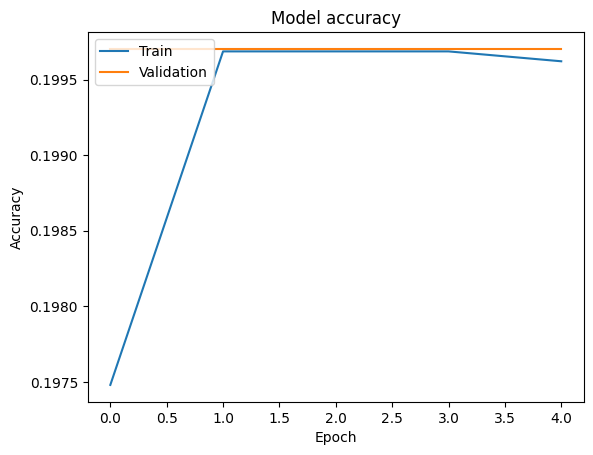

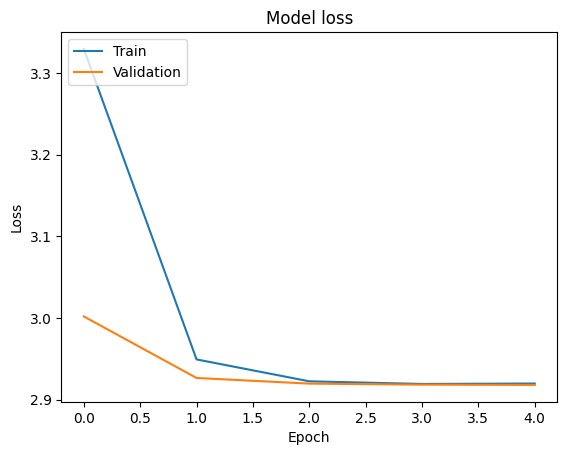

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [23]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

def build_pretrained_modelVGG(input_shape, num_classes):
    # Load VGG19 with pretrained weights
    base_modelVGG = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_modelVGG.trainable = False  # Freeze the base model layers

    # Define the model
    modelVGG = Sequential([
        base_modelVGG,
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return modelVGG

input_shapeVGG = (224, 224, 3)
num_classesVGG = len(train_generator.class_indices) 

modelVGG = build_pretrained_modelVGG(input_shapeVGG, num_classesVGG)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step


In [24]:
modelVGG.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
historyVGG = modelVGG.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5  # Adjust as necessary
)


Epoch 1/5
1912/1912 ━━━━━━━━━━━━━━━━━━━━ 969s 500ms/step - accuracy: 0.2117 - loss: 4.3958 - val_accuracy: 0.3222 - val_loss: 2.4824
Epoch 2/5
   1/1912 ━━━━━━━━━━━━━━━━━━━━ 1:59 63ms/step - accuracy: 0.3438 - loss: 2.4340

2024-10-25 14:36:12.943562: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1912/1912 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3438 - loss: 2.4340 - val_accuracy: 0.2857 - val_loss: 2.3189
Epoch 3/5
1912/1912 ━━━━━━━━━━━━━━━━━━━━ 847s 443ms/step - accuracy: 0.2621 - loss: 2.7199 - val_accuracy: 0.3217 - val_loss: 2.4420
Epoch 4/5
1912/1912 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.3438 - loss: 2.7110 - val_accuracy: 0.4286 - val_loss: 2.5598
Epoch 5/5


2024-10-25 14:50:23.673798: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-25 14:50:23.674218: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12452236928235634877
2024-10-25 14:50:23.674271: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2831342695805150578


1912/1912 ━━━━━━━━━━━━━━━━━━━━ 812s 425ms/step - accuracy: 0.2687 - loss: 2.6432 - val_accuracy: 0.3465 - val_loss: 2.3648


In [26]:
test_lossVGG, test_accuracyVGG = modelVGG.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracyVGG:.2f}')

547/547 ━━━━━━━━━━━━━━━━━━━━ 79s 145ms/step - accuracy: 0.4987 - loss: 2.0294
Test Accuracy: 0.35


In [27]:
from tensorflow.keras.applications import EfficientNetB0

def build_pretrained_modelEfficient(input_shape, num_classes):
    base_modelEF = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    base_modelEF.trainable = False
    modelEF = Sequential([
        base_modelEF,
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return modelEF

input_shapeEF = (224, 224, 3)
num_classesEF = len(train_generator.class_indices) 

modelEF = build_pretrained_modelEfficient(input_shapeEF, num_classesEF)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [28]:
modelEF.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
historyEF = modelEF.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5  # Adjust as necessary
)

Epoch 1/5
1912/1912 ━━━━━━━━━━━━━━━━━━━━ 915s 478ms/step - accuracy: 0.1708 - loss: 3.4698 - val_accuracy: 0.1994 - val_loss: 3.0005
Epoch 2/5
   1/1912 ━━━━━━━━━━━━━━━━━━━━ 2:14 71ms/step - accuracy: 0.1250 - loss: 3.2361

/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1912/1912 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1250 - loss: 3.2361 - val_accuracy: 0.5714 - val_loss: 2.2718
Epoch 3/5
1912/1912 ━━━━━━━━━━━━━━━━━━━━ 865s 452ms/step - accuracy: 0.2003 - loss: 2.9679 - val_accuracy: 0.1997 - val_loss: 2.9259
Epoch 4/5
1912/1912 ━━━━━━━━━━━━━━━━━━━━ 0s 14us/step - accuracy: 0.0938 - loss: 3.2186 - val_accuracy: 0.1429 - val_loss: 3.2139
Epoch 5/5


2024-10-25 15:40:30.213967: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1912/1912 ━━━━━━━━━━━━━━━━━━━━ 839s 439ms/step - accuracy: 0.1978 - loss: 2.9287 - val_accuracy: 0.1997 - val_loss: 2.9197


In [31]:
test_lossEF, test_accuracyEF = modelEF.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracyEF:.2f}')

547/547 ━━━━━━━━━━━━━━━━━━━━ 82s 150ms/step - accuracy: 0.5197 - loss: 2.5350
Test Accuracy: 0.20
